# Canadian Stock Project: Data Collection
This script downloads historical stock data for a list of top Canadian companies using the yfinance library. It processes the data by filling missing values and then concatenates the data for all companies into a single dataframe. The combined dataframe is saved as a CSV file named canadian_stock_data.csv. Additionally, the script loads a CSV file containing company headlines, performs sentiment analysis on the headlines, and saves the resulting data with sentiment scores to another CSV file named canadian_company_headlines_with_sentiment.csv.





## Script Outline
1. Download Historical Stock Data:
  * A list of top Canadian companies is defined.
  * Historical stock data from January 1, 2010, to April 30, 2024, is downloaded for each company.
  * Missing values in the data are filled using forward fill.

2. Concatenate and Save Stock Data:
  * Data for all companies is concatenated into a single dataframe.
  * The combined dataframe is saved as canadian_stock_data.csv.
  Load and Process Headlines Data:

3. A CSV file containing company headlines is loaded.
  * Sentiment analysis is performed on the headlines using the TextBlob library.
  * The resulting dataframe with sentiment scores is saved as canadian_company_headlines_with_sentiment.csv.

## Installations

In [20]:
!pip install newsapi-python
!pip install yfinance --upgrade --no-cache-dir

## Imports

In [38]:
import pandas as pd
import datetime
import numpy as np
import random as rnd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from newsapi import NewsApiClient
from textblob import TextBlob
import yfinance as yf

## Stock Data Preparation

In [49]:
# list of chosen Canadian companies
canadian_stock_list = [
    'RY.TO', 'TD.TO', 'BNS.TO', 'ENB.TO', 'CNQ.TO', 'SHOP.TO', 'BMO.TO', 'BCE.TO', 'TRP.TO', 'CNR.TO', 'SU.TO',
    'FTS.TO', 'MRU.TO', 'MG.TO', 'MFC.TO', 'POW.TO', 'SLF.TO', 'NA.TO'
]

# time period for data collection
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2024, 4, 30)

In [50]:
canadian_stock_data = {}

# downloading data for each stock
for stock in canadian_stock_list:
    try:
        canadian_stock_data[stock] = yf.download(stock, start=start_date, end=end_date)
        # print(f"Downloaded data for {stock}")
    except Exception as e:
        print(f"Failed to download data for {stock}: {e}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [51]:
for stock in canadian_stock_data:
    canadian_stock_data[stock].fillna(method='ffill', inplace=True)

In [53]:
# concatenate all stock data into one df
all_stock_data = pd.concat([df.assign(Stock=stock) for stock, df in canadian_stock_data.items()])

# save the df to a CSV file
all_stock_data.to_csv('canadian_stock_data.csv', index=False)
print("Stock data saved to 'canadian_stock_data.csv'.")

Stock data saved to 'canadian_stock_data.csv'.


## News Data Preparation

In [26]:
newsapi = NewsApiClient(api_key=KEY)

In [27]:
# list of companies and related keywords
keywords = ["Royal Bank of Canada", "RBC", "Royal Bank", "RY.TO",
            "Toronto-Dominion Bank", "TD Bank", "TD", "Toronto-Dominion", "TD.TO",
            "Bank of Nova Scotia", "Scotiabank", "BNS", "Bank of Nova Scotia", "BNS.TO",
            "Enbridge Inc.", "Enbridge", "ENB", "Enbridge Inc.", "ENB.TO",
            "Canadian Natural Resources Limited", "CNRL", "Canadian Natural", "CNQ", "CNQ.TO",
            "Shopify Inc.", "Shopify", "SHOP", "SHOP.TO",
            "Bank of Montreal", "BMO", "Bank of Montreal", "BMO.TO",
            "BCE Inc.", "BCE", "Bell Canada", "BCE.TO",
            "TC Energy Corporation", "TC Energy", "TransCanada", "TRP", "TRP.TO",
            "Canadian National Railway Company", "CN Rail", "CNR", "Canadian National", "CNR.TO",
            "Alimentation Couche-Tard Inc.", "Couche-Tard", "ATD", "ATD.TO",
            "Suncor Energy Inc.", "Suncor", "SU", "SU.TO",
            "Fortis Inc.", "Fortis", "FTS", "FTS.TO",
            "Metro Inc.", "Metro", "MRU", "MRU.TO",
            "Magna International Inc.", "Magna", "MG", "MG.TO",
            "Manulife Financial Corporation", "Manulife", "MFC", "MFC.TO",
            "Power Corporation of Canada", "Power Corp", "POW", "POW.TO",
            "Sun Life Financial Inc.", "Sun Life", "SLF", "SLF.TO",
            "National Bank of Canada", "National Bank", "NA", "NA.TO",
            "Brookfield Asset Management Inc.", "Brookfield", "BAM", "BAM.TO",
            "Canadian economy", "Canada stock market", "TSX", "Toronto Stock Exchange",
            "Canadian dollar", "CAD", "Canadian inflation", "Canadian GDP",
            "Bank of Canada", "BoC", "Canadian interest rates", "Canadian housing market",
            "Canada unemployment"]

# date range for the news articles
start_date = (datetime.datetime.now() - datetime.timedelta(days=30)).strftime('%Y-%m-%d')
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

In [28]:
# empty df to store the headlines
headlines_df = pd.DataFrame(columns=['keyword', 'headline', 'published_at'])

In [29]:
# get news headlines for each keyword
for keyword in keywords:
    all_articles = newsapi.get_everything(q=keyword,
                                          from_param=start_date,
                                          to=end_date,
                                          language='en',
                                          sort_by='relevancy',
                                          page_size=100)

    for article in all_articles['articles']:
        headlines_df = pd.concat([headlines_df, pd.DataFrame({'keyword': [keyword],
                                                              'headline': [article['title']],
                                                              'published_at': [article['publishedAt']]})],
                                 ignore_index=True)

# save the headlines to a CSV file
headlines_df.to_csv('canadian_company_headlines.csv', index=False)
print("News headlines fetched and saved to 'canadian_company_headlines.csv'.")

## Sentiment Analysis

In [ ]:
headlines_df = pd.read_csv('/content/canadian_company_headlines.csv')

# change 'published_at' to date in the right format
headlines_df['published_at'] = pd.to_datetime(headlines_df['published_at'])
headlines_df['date'] = headlines_df['published_at'].dt.date

headlines_df['headline'] = headlines_df['headline'].astype(str)

In [34]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# calculate sentiment polarity for each headline
headlines_df['sentiment'] = headlines_df['headline'].apply(get_sentiment)

# upload headlines with sentiment information to a new CSV file
headlines_df.to_csv('canadian_company_headlines_with_sentiment.csv', index=False)
print("Sentiment analysis completed and saved to 'canadian_company_headlines_with_sentiment.csv'.")

Sentiment analysis completed and saved to 'canadian_company_headlines_with_sentiment.csv'.


## Data Visualizations

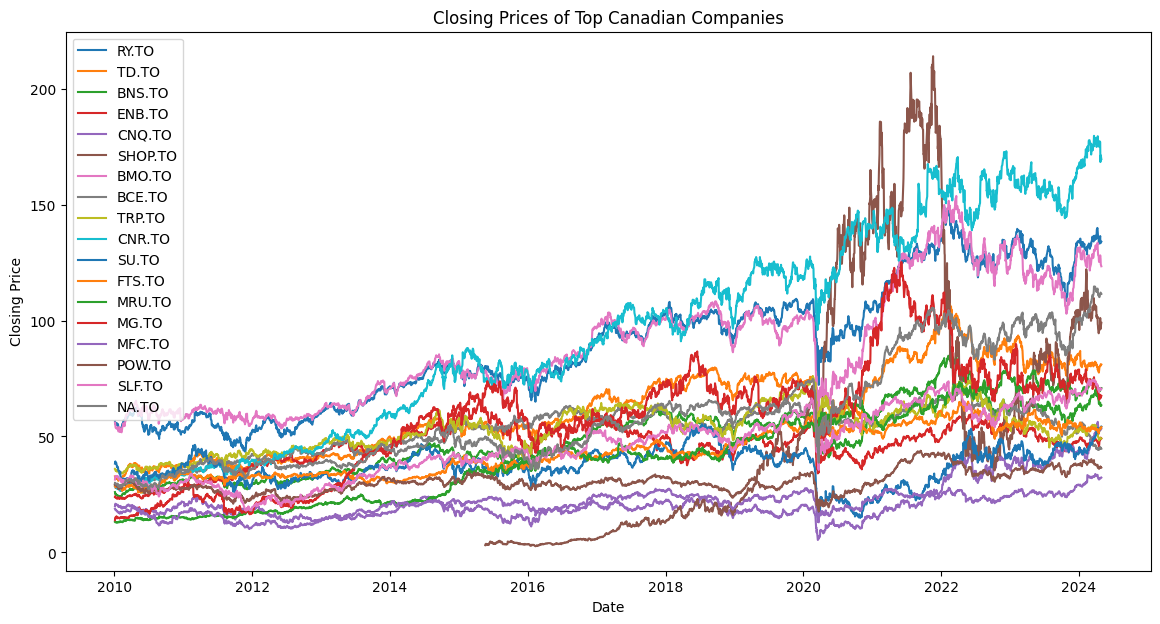

In [55]:
# Plot closing prices for each stock
plt.figure(figsize=(14, 7))
for stock in canadian_stock_list:
    plt.plot(canadian_stock_data[stock].index, canadian_stock_data[stock]['Close'], label=stock)
plt.title('Closing Prices of Top Canadian Companies')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

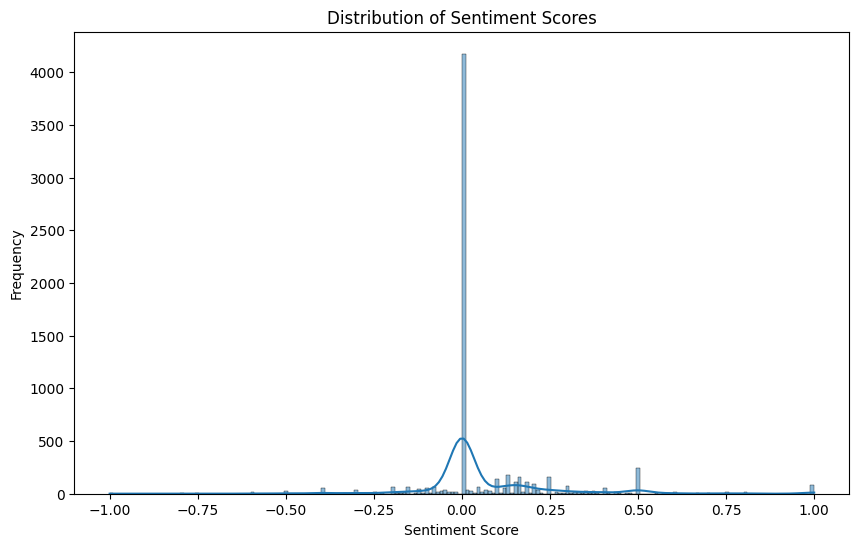

In [56]:
# Plot distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(headlines_df['sentiment'], kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

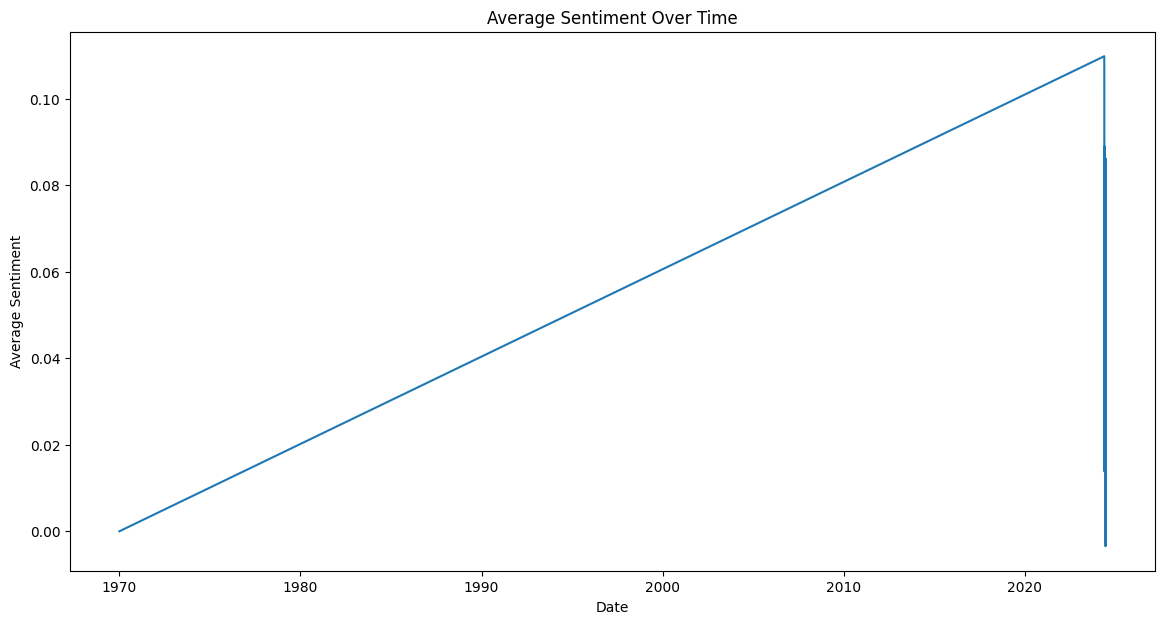

In [57]:
# Aggregate sentiment data by date
sentiment_agg = headlines_df.groupby('date')['sentiment'].mean().reset_index()
sentiment_agg['date'] = pd.to_datetime(sentiment_agg['date'])

# Plot average sentiment over time
plt.figure(figsize=(14, 7))
plt.plot(sentiment_agg['date'], sentiment_agg['sentiment'])
plt.title('Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.show()